In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_mid_surface-flask_1_ccgg_month.txt'
df = pd.read_csv(url, delimiter="\s+", skiprows=54, names=['site', 'year', 'month', 'value'])

In [3]:
# Convert pandas DataFrame to TensorFlow dataset
min_year = min(df['year'].values)
dataset = tf.data.Dataset.from_tensor_slices((df['site'].values, df['year'].values%min_year*12 + df['month'].values, df['value'].values))

In [22]:
for data in dataset.take(452):  # Print the first 5 elements for example
    site, adjusted_year_month, value = data
    print("Site:", site.numpy(), "Adjusted Year Month:", adjusted_year_month.numpy(), "Value:", value.numpy())

Site: b'MID' Adjusted Year Month: 5 Value: 350.28
Site: b'MID' Adjusted Year Month: 6 Value: 348.82
Site: b'MID' Adjusted Year Month: 7 Value: 347.17
Site: b'MID' Adjusted Year Month: 8 Value: 344.69
Site: b'MID' Adjusted Year Month: 9 Value: 342.39
Site: b'MID' Adjusted Year Month: 10 Value: 343.47
Site: b'MID' Adjusted Year Month: 11 Value: 345.88
Site: b'MID' Adjusted Year Month: 12 Value: 346.89
Site: b'MID' Adjusted Year Month: 13 Value: 348.44
Site: b'MID' Adjusted Year Month: 14 Value: 349.72
Site: b'MID' Adjusted Year Month: 15 Value: 349.92
Site: b'MID' Adjusted Year Month: 16 Value: 350.6
Site: b'MID' Adjusted Year Month: 17 Value: 351.5
Site: b'MID' Adjusted Year Month: 18 Value: 350.51
Site: b'MID' Adjusted Year Month: 19 Value: 348.39
Site: b'MID' Adjusted Year Month: 20 Value: 344.9
Site: b'MID' Adjusted Year Month: 21 Value: 342.86
Site: b'MID' Adjusted Year Month: 22 Value: 345.08
Site: b'MID' Adjusted Year Month: 23 Value: 347.85
Site: b'MID' Adjusted Year Month: 24 Va

2024-03-26 00:57:54.938990: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
# Assuming your complex data is in the 'value' column
data_vector = df['value'].values  # Convert to numpy array

# Perform Discrete Fourier Transform (DFT) using TensorFlow
result_dft = tf.signal.fft(tf.cast(data_vector, tf.complex64))

# Display the result or use it as needed
print("Discrete Fourier Transform Result:", result_dft)

In [ ]:
# Get the length of the DFT result
N = len(result_dft)

# Define the sampling rate
sampling_rate = 1 / 12  # Monthly data, so sampling rate is 1/12 samples per year

# Calculate the frequencies corresponding to the DFT
frequencies = np.fft.fftfreq(N, d=sampling_rate)

# Print the frequencies
print("Frequencies:", frequencies)

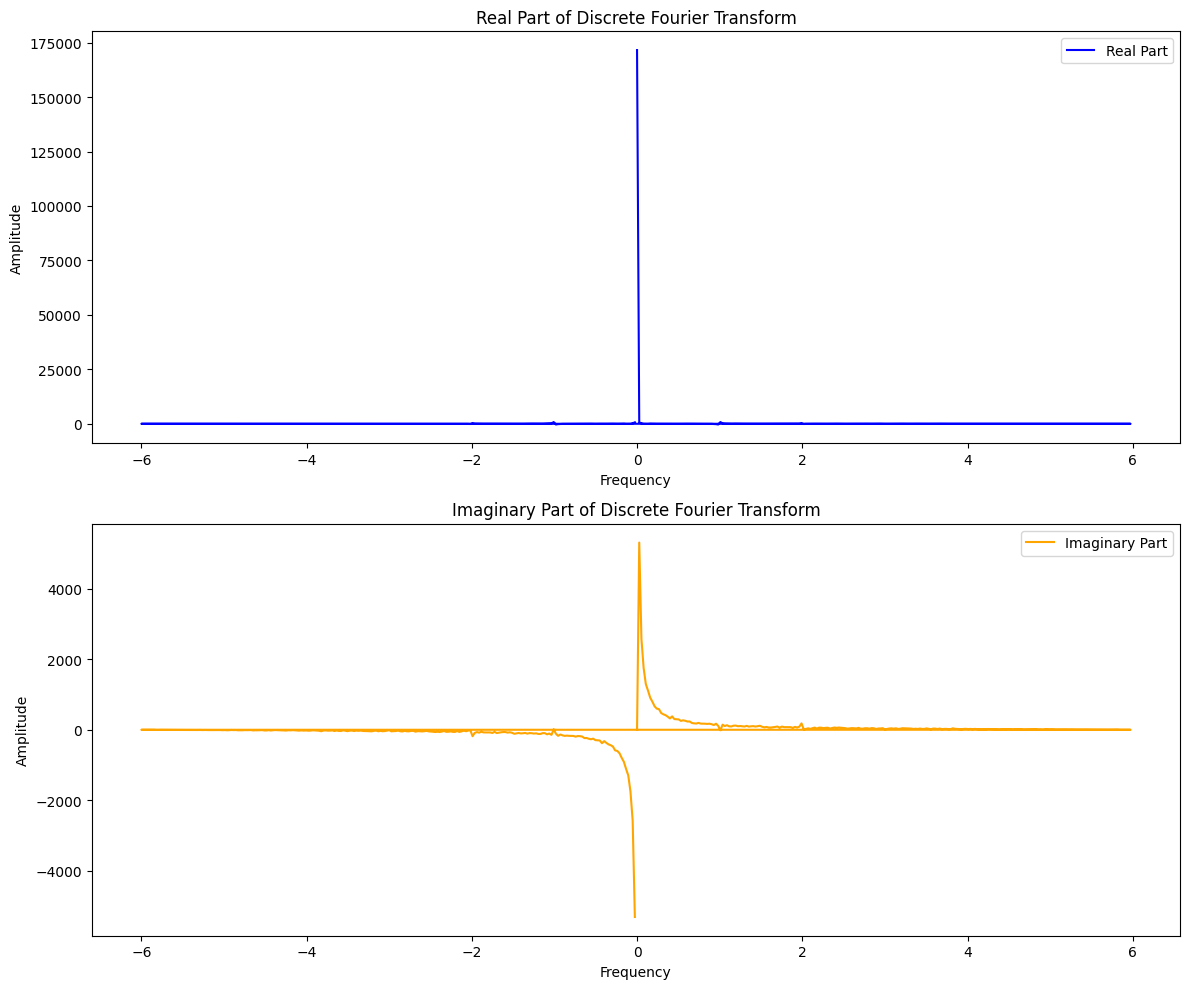

In [20]:
# Perform Discrete Fourier Transform (DFT) using TensorFlow
result_dft = tf.signal.fft(tf.cast(data_vector, tf.complex64))

# Calculate frequencies
N = len(data_vector)
frequencies = np.fft.fftfreq(N, d=sampling_rate)

# Plot the real and imaginary parts of the DFT with increased spacing
plt.figure(figsize=(12, 10))

# Plot the real part
plt.subplot(2, 1, 1)
plt.plot(frequencies, tf.math.real(result_dft), label='Real Part', color='blue')
plt.title('Real Part of Discrete Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()

# Add some vertical spacing
plt.subplots_adjust(hspace=0.5)

# Plot the imaginary part
plt.subplot(2, 1, 2)
plt.plot(frequencies, tf.math.imag(result_dft), label='Imaginary Part', color='orange')
plt.title('Imaginary Part of Discrete Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

In [ ]:
for data in dataset.take(452):
    print(data)

In [24]:
# Assuming your data is in the 'value' column
data_vector = df['value'].values  # Convert to numpy array

# Slice the data
cut_data = data_vector[:256]

# Perform FFT using TensorFlow
X = tf.signal.fft(tf.cast(cut_data, tf.complex64))

# Display the result or use it as needed
print("FFT Result:", X)

FFT Result: tf.Tensor(
[ 9.30519531e+04+0.00000000e+00j  1.53593140e+02+1.35434180e+03j
 -4.36081123e+01+6.98629761e+02j -2.87115765e+01+5.52554504e+02j
 -1.22629585e+01+3.92363831e+02j -2.86162701e+01+2.87290009e+02j
  1.52972393e+01+2.68040283e+02j  3.06106663e+00+2.06597504e+02j
 -4.44027615e+00+1.74693298e+02j -3.63728714e+01+1.96914032e+02j
 -1.92814178e+01+1.48692169e+02j -2.55095825e+01+1.38834717e+02j
 -1.35463829e+01+1.46081345e+02j -1.15148745e+01+1.32045776e+02j
 -4.88898277e-01+1.06133324e+02j -2.30796852e+01+9.64007187e+01j
 -1.73509369e+01+1.14223679e+02j -2.70607624e+01+1.15001953e+02j
 -1.58955526e+01+1.33136581e+02j -2.73922367e+01+1.41902161e+02j
 -6.29495773e+01+1.58899506e+02j -1.41243164e+02+4.32791901e+02j
  4.63480301e+01-1.33795563e+02j  1.07326412e+00-1.98318367e+01j
  2.85848045e+00-1.29647112e+01j -2.66063976e+00+2.75159492e+01j
 -9.20104122e+00+1.64966621e+01j  6.11985970e+00+2.61557655e+01j
 -2.03943138e+01+2.22252541e+01j -1.12958193e+01+1.78430710e+01j
 -

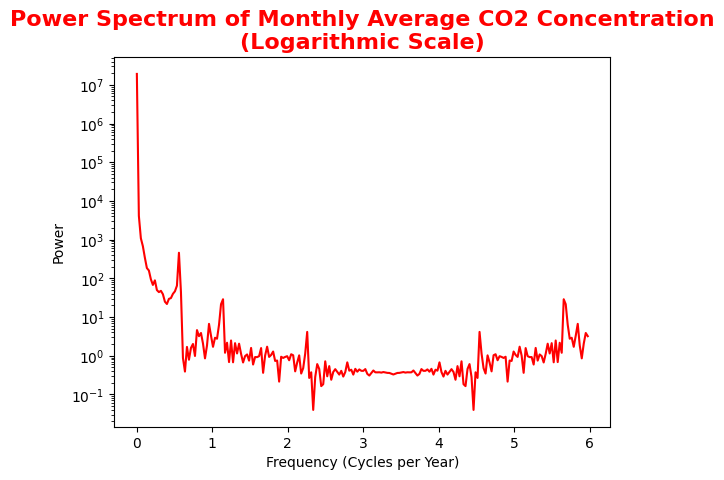

In [27]:
# Plot the power spectrum on a logarithmic scale
plt.plot(frequencies[:N//2], tf.abs(X[:N//2])**2/N, color='red')
plt.yscale("log")

# Add axis labels and title
plt.xlabel('Frequency (Cycles per Year)')
plt.ylabel('Power')
plt.title('Power Spectrum of Monthly Average CO2 Concentration\n(Logarithmic Scale)', fontsize=16, fontweight='bold', color='red')

plt.show()

In [28]:
import matplotlib.pyplot as plt

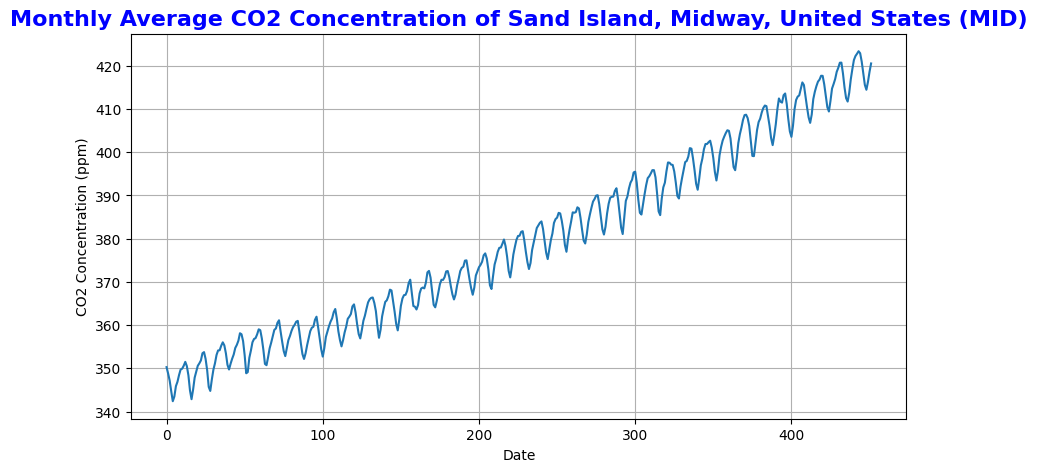

In [29]:
df['value'].plot(figsize=(10, 5), title='Monthly Average CO2 Concentration of Sand Island, Midway, United States (MID)', grid=True)
plt.xlabel('Date')
plt.ylabel('CO2 Concentration (ppm)')

# Increase the font size and make the title bold and blue
plt.title('Monthly Average CO2 Concentration of Sand Island, Midway, United States (MID)', fontsize=16, fontweight='bold', color='blue')

plt.show()